In [ ]:
####################################### K-Mean Clustering ##############################################

In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [23]:
# Load the dataset from a CSV file named 'income.csv' into a pandas DataFrame
df = pd.read_csv('income.csv')
# Display the entire DataFrame
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


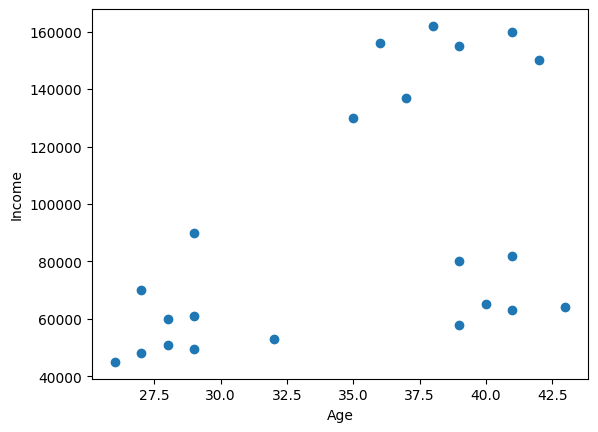

In [24]:
# Create a scatter plot of 'Age' vs 'Income($)' to visualize the data distribution
plt.scatter(df['Age'],df['Income($)'])
# Label the x-axis as "Age"
plt.xlabel("Age")
# Label the y-axis as "Income"
plt.ylabel("Income")
# Display the plot
plt.show()

In [25]:
# Initialize the KMeans clustering model with 3 clusters
km = KMeans(n_clusters = 3)

In [26]:
# Display the DataFrame again (likely to show the original data before clustering)
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [27]:
# Select the 'Age' and 'Income($)' columns as the features for clustering
x =  df[["Age","Income($)"]]

In [28]:
# Fit the KMeans model to the data and predict the cluster for each data point
# fit_predict performs both fitting and prediction in one step
y_pred = km.fit_predict(x)

In [29]:
# Display the predicted cluster labels for each data point
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [30]:
# Display the DataFrame again (likely to show the data before adding cluster labels)
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [31]:
# Add the predicted cluster labels as a new column named 'cluster' to the DataFrame
df['cluster'] = y_pred
# Display the DataFrame with the new 'cluster' column
df

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,2


In [32]:
# Display the coordinates of the cluster centers found by the KMeans algorithm
km.cluster_centers_

array([[3.92000000e+01, 1.56600000e+05],
       [3.32000000e+01, 6.26333333e+04],
       [3.60000000e+01, 1.33500000e+05]])

In [33]:
# Create separate DataFrames for each cluster
# This is done to easily plot each cluster with a different color
df1 = df[df['cluster']== 0]
df2 = df[df['cluster']== 1]
df3 = df[df['cluster']== 2]

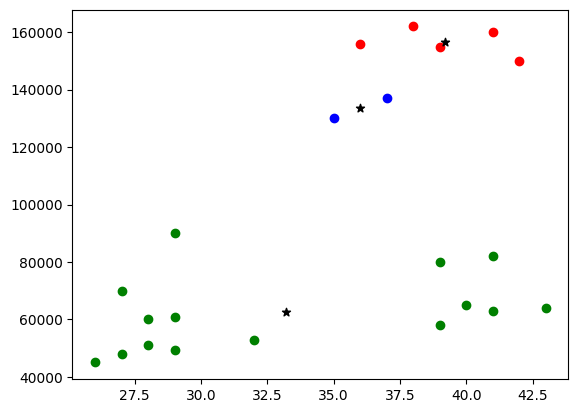

In [34]:
# Create scatter plots for each cluster with different colors
plt.scatter(df1['Age'],df1['Income($)'],color = "Red")
plt.scatter(df2['Age'],df2['Income($)'],color = "Green")
plt.scatter(df3['Age'],df3['Income($)'],color = "Blue")

# Plot the cluster centers as black stars
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = "black",marker = "*",label = "Centroid")

In [35]:
# ======================== Now Scaling the data ===============================



# Preprocessing: Feature scaling using MinMaxScaler
# Scaling is important for KMeans as it is distance-based and sensitive to the scale of features
scaler = MinMaxScaler()

In [36]:
# Scale the 'Income($)' column
scaler.fit(df[['Income($)']]) # Fit the scaler on the 'Income($)' data
df['Income($)'] = scaler.transform(df[['Income($)']]) # Transform the 'Income($)' column

# Scale the 'Age' column
scaler.fit(df[['Age']]) # Fit the scaler on the 'Age' data
df['Age'] = scaler.transform(df[['Age']]) # Transform the 'Age' column


# Display the DataFrame after scaling the 'Age' and 'Income($)' columns
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,2


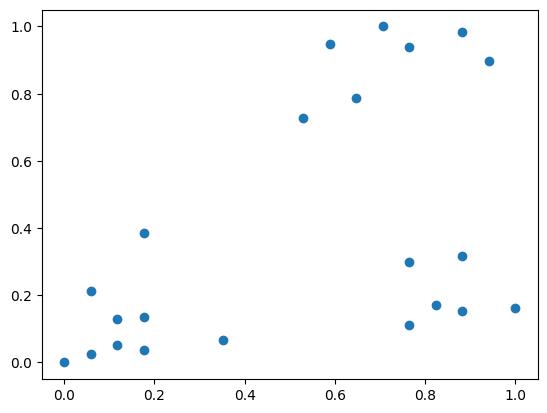

In [37]:
# Create a scatter plot of the scaled 'Age' vs scaled 'Income($)'
# This visualizes the data distribution after scaling
plt.scatter(df['Age'],df['Income($)'])

In [38]:
# Initialize a new KMeans model with 3 clusters for the scaled data
km1 = KMeans(n_clusters = 3)
# Fit the new KMeans model to the scaled data and predict the cluster for each data point
y_pred1 = km1.fit_predict(df[['Age','Income($)']])
# Display the predicted cluster labels for the scaled data
y_pred1

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [39]:
# Add the predicted cluster labels from the scaled data as a new column named 'cluster1' to the DataFrame
df['cluster1'] = y_pred1
# Display the DataFrame with the new 'cluster1' column
df

,Name,Age,Income($),cluster,cluster1
0,Rob,0.058824,0.213675,1,1
1,Michael,0.176471,0.384615,1,1
2,Mohan,0.176471,0.136752,1,1
3,Ismail,0.117647,0.128205,1,1
4,Kory,0.941176,0.897436,0,2
5,Gautam,0.764706,0.940171,0,2
6,David,0.882353,0.982906,0,2
7,Andrea,0.705882,1.000000,0,2
8,Brad,0.588235,0.948718,0,2
9,Angelina,0.529412,0.726496,2,2


In [40]:
# Display the coordinates of the cluster centers found by the KMeans algorithm on the scaled data
km1.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [41]:
# Create separate DataFrames for each cluster based on the 'cluster1' column (from scaled data)
# This is done to easily plot each cluster with a different color
df1 = df[df['cluster1']==0]
df2 = df[df['cluster1']==1]
df3 = df[df['cluster1']==2]

Text(0, 0.5, 'Income')

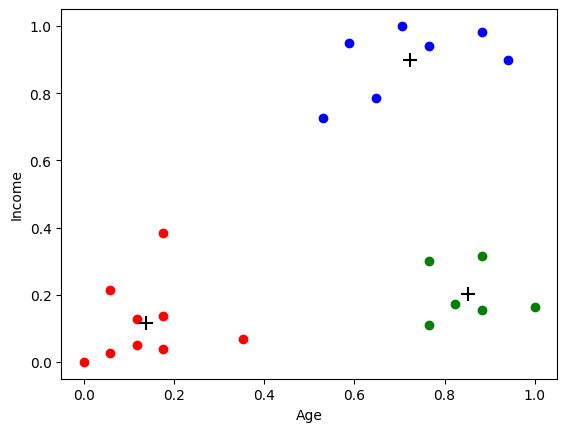

In [42]:
# Create scatter plots for each cluster (from scaled data) with different colors
plt.scatter(df1['Age'],df1['Income($)'],color = "green")
plt.scatter(df2['Age'],df2['Income($)'],color = "red")
plt.scatter(df3['Age'],df3['Income($)'],color = "Blue")
# Plot the cluster centers (from scaled data) as black plus signs
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color = "black",marker = "+",label = "Centroid",s = 100)

# Label the x-axis as "Age"
plt.xlabel("Age")
# Label the y-axis as "Income"
plt.ylabel('Income')